In [1]:
import sys
print(sys.version)
%matplotlib inline
%run -i ~/Python/pjr3

3.7.9 | packaged by conda-forge | (default, Dec  9 2020, 20:58:55) 
[Clang 11.0.0 ]
pjr3.py complete


In [2]:
print ("two vals of pi", np.pi, pi)

two vals of pi 3.141592653589793 3.141592653589793


$$
f(t) = \Sigma_i (a_i cos({2\pi\over i} t) + b_i sin({2\pi\over i} t)))
$$


In [3]:
findNiceContours?

Signature: findNiceContours(data, nlevs=None, rmClev=None, sym=None, verbose=None)
Docstring:
Find Nice Contours
data = 2d numpy array (or data structure base on numpy) ordered (latitude, pressure)
nlevs = approximate number of contour levels to return (default 10)
rmClev = if defined delete the contour level near this value
sym = if defined make the contour intervals symmetric about zero
verbose = if defined, print out some info to help debug
File:      ~/Python/pjr3.py
Type:      function


In [4]:
plotZMf?

Signature: plotZMf(data, x, y, plotOpt=None, modelLevels=None, surfacePressure=None, axesa=None, fig=None)
Docstring:
Create a zonal mean contour plot of one variable
axesa = the axes that we make the plot on 
data = 2d numpy array (or data structure base on numpy) ordered (latitude, pressure)
x = 1d numpy array of latitude
y = 1d numpy array of pressures (or pseudo pressure (like eta))
plotOpt is a optional dictionary with plotting options:
  'scale_factor': multiply values with this factor before plotting
  'units': a units label for the colorbar
  'clevs': use list of values as contour intervals
  'cmap': the color map to use
  'cabv': the above color
  'cbel': the below color
  'colorbar': location of colorbar ('bot','top','left','right','None')
  'rmClev': contour level to delete; frequently Zero, see findNiceContours
  'title': a title for the plot
  'ybot': if present, the pressure at the plot bottom
  'ytop': if present, the pressure at the top
modelLevels:  If present a small 

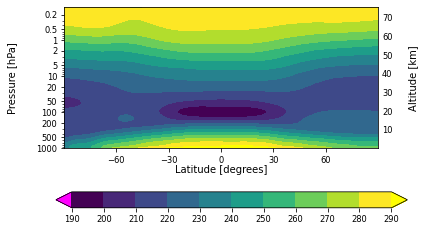

In [5]:
DS = xr.open_dataset('~/NetCDF_Files/vd05_ANN_climo.nc')
#print (DS.T) 
T = DS.T.isel(time=0)
#T?
TZ = T.mean(dim='lon')
#TZ?
lev = TZ['lev']
lat = TZ['lat']
vals = TZ.values
plotZMf(vals, lat, lev)


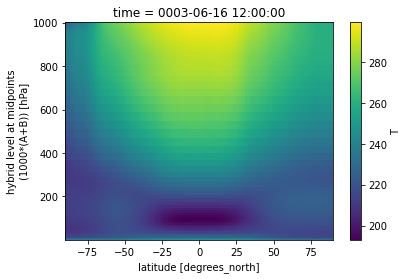

In [6]:
TZ.plot()
plt.show()

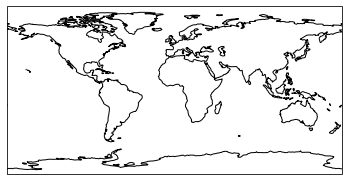

In [7]:
da = DS.PS# Draw coastlines of the Earth
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines() 



#da.plot()
plt.show()

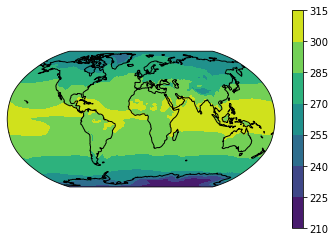

In [8]:
fig = plt.figure()
TS = DS.TS# Draw coastlines of the Earth
TS = TS.isel(time=0)
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
lon = TS['lon']
lat = TS['lat']
img = ax.contourf(lon, lat, TS, transform=ccrs.PlateCarree())
plt.colorbar(img)
#da.plot()
plt.show()

In [9]:
FSUTOA = DS.FSUTOA
FSUTOA = FSUTOA.isel(time=0)
print(FSUTOA.min(),FSUTOA.max())

<xarray.DataArray 'FSUTOA' ()>
array(41.8322525)
Coordinates:
    time     object 0003-06-16 12:00:00 <xarray.DataArray 'FSUTOA' ()>
array(191.42416382)
Coordinates:
    time     object 0003-06-16 12:00:00


In [10]:
FSNTOAC = DS.FSNTOAC
FSNTOAC = FSNTOAC.isel(time=0)
print(FSNTOAC.min(),FSNTOAC.max())
FSNTOA = DS.FSNTOA
FSNTOA = FSNTOA.isel(time=0)
print(FSNTOA.min(),FSNTOAC.max())
SWCF2 = FSNTOA-FSNTOAC
print(SWCF2.min(),SWCF2.max())
SWCF = DS.SWCF
SWCF = SWCF.isel(time=0)
print(SWCF.min(),SWCF.max())
print(SWCF)

<xarray.DataArray 'FSNTOAC' ()>
array(48.08882523)
Coordinates:
    time     object 0003-06-16 12:00:00 <xarray.DataArray 'FSNTOAC' ()>
array(379.50192261)
Coordinates:
    time     object 0003-06-16 12:00:00
<xarray.DataArray 'FSNTOA' ()>
array(47.64038849)
Coordinates:
    time     object 0003-06-16 12:00:00 <xarray.DataArray 'FSNTOAC' ()>
array(379.50192261)
Coordinates:
    time     object 0003-06-16 12:00:00
<xarray.DataArray ()>
array(-133.22192383)
Coordinates:
    time     object 0003-06-16 12:00:00 <xarray.DataArray ()>
array(-0.32240677)
Coordinates:
    time     object 0003-06-16 12:00:00
<xarray.DataArray 'SWCF' ()>
array(-133.22192383)
Coordinates:
    time     object 0003-06-16 12:00:00 <xarray.DataArray 'SWCF' ()>
array(-0.32240623)
Coordinates:
    time     object 0003-06-16 12:00:00
<xarray.DataArray 'SWCF' (lat: 192, lon: 288)>
array([[ -1.334573,  -1.334583,  -1.334614, ...,  -1.334665,  -1.334614,
         -1.334583],
       [ -1.3131  ,  -1.3131  ,  -1.3131  , ...,